In [1]:
import pandas as pd
data_frame = pd.read_csv("data.csv")
data_frame.shape

(17660, 29)

In [2]:
data_frame.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Kit Number
count,17660.000000,17660.000000,17660.000000,17660.000000,17660.000000,17660.000000,17660.000000,17660.000000,17625.000000
mean,246319.424462,23.127746,63.369592,70.981200,1537.915855,1.106285,2.900340,2.297169,25.037957
std,31487.892861,4.639821,8.036268,6.529836,285.893809,0.407021,0.663523,0.754264,19.154116
min,16.000000,15.000000,43.000000,42.000000,749.000000,1.000000,1.000000,1.000000,1.000000
25%,240732.500000,20.000000,58.000000,67.000000,1387.000000,1.000000,3.000000,2.000000,11.000000
50%,257041.000000,22.000000,63.000000,71.000000,1548.000000,1.000000,3.000000,2.000000,22.000000
75%,263027.500000,26.000000,69.000000,75.000000,1727.000000,1.000000,3.000000,3.000000,32.000000
max,271340.000000,54.000000,91.000000,95.000000,2312.000000,5.000000,5.000000,5.000000,99.000000


In [3]:
data_frame.values

array([[209658, 'L. Goretzka', 27, ..., '€157M', 8.0, nan],
       [212198, 'Bruno Fernandes', 27, ..., '€155M', 8.0, nan],
       [224334, 'M. Acuña', 30, ..., '€97.7M', 19.0, nan],
       ...,
       [270567, 'A. Demir', 25, ..., '€142K', 12.0, nan],
       [256624, '21\xa0S. Czajor', 18, ..., '€214K', 40.0, nan],
       [256376, '21\xa0F. Jakobsson', 20, ..., '€131K', 30.0, nan]],
      dtype=object)

In [4]:
df1 = pd.DataFrame(data_frame, columns=["Name", "Wage", "Value"])

def value_to_float(x):
    if type(x) is float or type(x) is int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return 0.0

wage = df1["Wage"].replace("[\€]", "", regex=True).apply(value_to_float)
value = df1["Value"].replace("[\€]", "", regex=True).apply(value_to_float)

df1["Wage"] = wage
df1["Value"] = value

df1["difference"] = df1["Value"] - df1["Wage"]
df1.sort_values("difference", ascending=False)

,Name,Wage,Value,difference
75,K. Mbappé,230000.0,190500000.0,190270000.0
180,E. Haaland,220000.0,148000000.0,147780000.0
17,F. de Jong,230000.0,116500000.0,116270000.0
214,Pedri,115000.0,116000000.0,115885000.0
25,M. Salah,270000.0,115500000.0,115230000.0
...,...,...,...,...
8455,14 Índio,20000.0,0.0,-20000.0
2031,14 J. Zanetti,45000.0,1000.0,-44000.0
199,R. Kent,45000.0,0.0,-45000.0
1287,14 R. Giggs,60000.0,1000.0,-59000.0


<Axes: xlabel='Wage', ylabel='Value'>

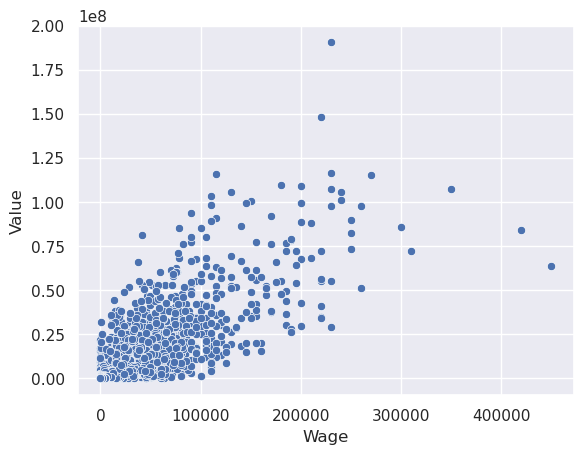

In [6]:
import seaborn as sns
sns.set_theme()

graph = sns.scatterplot(x="Wage", y="Value", data = df1)
graph

In [14]:
from bokeh.plotting import figure, show
from bokeh.models import HoverTool


TOOLTIPS = HoverTool(tooltips=[("index","$index"),("(Wage,Value)", "(@Wage,@Value)"), ("Name","@Name")])

p = figure(title="Fifa 2023", x_axis_label="Wage",y_axis_label="Value", tools=[TOOLTIPS])
p.scatter("Wage", "Value", size=10, source=df1)
show(p)


[1110/174738.512952:ERROR:file_io_posix.cc(153)] open /home/jonee/.config/BraveSoftware/Brave-Browser/Crash Reports/pending/33f681aa-9463-43b8-9077-efec72748654.lock: File exists (17)


Opening in existing browser session.
